# Hierarchical model: factory data with Stan

Some bootstraping code

In [11]:
import pystan
import numpy as np
import pickle
import matplotlib.pyplot as plt

raw_data = np.loadtxt('factory.txt')
x = np.tile(np.arange(1, 7), raw_data.shape[0])
y = raw_data.ravel()
print(raw_data[0,1])


117.0


-------------------------------

**Separate model**  


The answers are  after the source code

In [19]:
%%capture
alter_model = """
data {
  int<lower=0> N; // number of observation per machine
  int<lower=0> K; // number of machine
  matrix[N,K] y; // matrix with of which 1 column is observations of a machine
}
parameters {
  real theta0; // common theta for each K machine theta
  real<lower=0> sigma0; // common sta...
  real theta[K]; // machine specific theta
  real<lower=0> sigma; // common std
}
model {
  for (k in 1:K)
    theta[k] ~ normal(theta0, sigma0); // compute machine theta from common theta
  for (k in 1:K)
    y[:,k] ~ normal(theta[k], sigma);
}
generated quantities {
    real ypred_6; // predictive distribution for the 6th machine
    real theta7;
    matrix[N,K] log_lik;
    ypred_6 = normal_rng(theta[6], sigma);
    theta7 = normal_rng(theta0, sigma0);
    for (k in 1:K)
      for (i in 1:N)
        log_lik[i,k] = normal_lpdf(y[i,k] | theta[k], sigma);
}
"""
model="""
data {
  int<lower=0> N; // number of data points
  int<lower=0> K; // number of groups
  int<lower=1,upper=K> x[N]; // group indicator
  vector[N] y; //
}
parameters {
  vector[K] mu;        // group means
  vector<lower=0>[K] sigma; // group std
}
model {
  y ~ normal(mu[x], sigma[x]);
}
generated quantities {
    real ypred_6; // predictive distribution for the 6th machine
    ypred_6 = normal_rng(mu[6], sigma[6]);
}
"""

"""
real ypred_6; // predictive distribution for the 6th machine
    ypred_6 = normal_rng(mu[6], sigma[6]);
"""

#data = dict(N=30, K=6, x=x, y=y)
#sm = pystan.StanModel(model_code=model)
data = dict(N=5, K=6, y=raw_data)
sm = pystan.StanModel(model_code=alter_model)
fit = sm.sampling(data=data, iter=1000, chains=4)
samples = fit.extract(permuted=True)

def plot_i_ii():
    plt.hist(samples['mu'][:,5])
    plt.title('Posterior distribution of 6th machine')
    plt.show()
    plt.hist(samples['ypred_6'])
    plt.title('Predictive distribution of 6th machine')
    plt.show()
    

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_47879e64d76f6e213ddc2ef716bec596 NOW.


##### Stan model inference

In [48]:
from psis import psisloo
# print(len(samples['log_lik'][0]))
log_lik_matrix = np.asarray([single_sample.flatten() for single_sample in samples['log_lik']])
foo = psisloo(log_lik_matrix)
print(type(foo))
print(len(foo))
print(foo)

<class 'tuple'>
3
(-126.83405269784245, array([-3.78738821, -4.26568386, -4.13504285, -3.77501649, -4.08787087,
       -6.39813754, -4.18729624, -3.84269731, -3.78411369, -4.13064384,
       -3.83250886, -3.79224495, -4.18729624, -4.06470431, -3.76519895,
       -3.96465874, -4.12594247, -4.49769078, -7.10357678, -3.75683426,
       -3.76276854, -3.83823461, -4.08787087, -4.02864682, -4.19518982,
       -4.51341512, -5.05987963, -3.96465874, -3.73437925, -4.16446206]), array([0.15120484, 0.40068629, 0.21415363, 0.32665159, 0.20674065,
       0.50994476, 0.28181228, 0.28487425, 0.20619065, 0.13918379,
       0.13688524, 0.38434898, 0.28181228, 0.27215344, 0.18947655,
       0.06867945, 0.14329249, 0.34610903, 0.58757382, 0.13616552,
       0.14404126, 0.33850923, 0.20674065, 0.2492721 , 0.20639715,
       0.32715729, 0.37283726, 0.06867945, 0.18717735, 0.28012923]))


In [28]:
print('foo')
# print(fit)

foo


##### Answers for i) and ii)

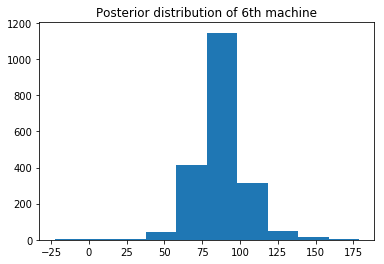

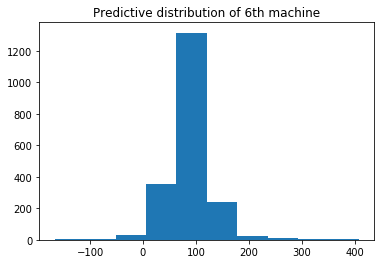

In [9]:
plot_i_ii()

##### Answer for iii)
This histogram for the 7th machine should be the same as in i) for the 6th machine because they have the same distribution for this case   
      

-------------------------------

**Pool model**  



The answers are  after the source code.
Pool model stan code is very similar to separate model. Sigma is a single value in this case

In [10]:
%%capture
model="""
data {
  int<lower=0> N; // number of data points
  int<lower=0> K; // number of groups
  int<lower=1,upper=K> x[N]; // group indicator
  vector[N] y; //
}
parameters {
  vector[K] mu;        // group means
  real<lower=0> sigma; // common std
}
model {
  y ~ normal(mu[x], sigma);
}
generated quantities {
    real ypred_6; // predictive distribution for the 6th machine
    ypred_6 = normal_rng(mu[6], sigma);
}
"""

data = dict(N=30, K=6, x=x, y=y)
sm = pystan.StanModel(model_code=model)
fit = sm.sampling(data=data, iter=1000, chains=4)
samples = fit.extract(permuted=True)

def plot_i_ii():
    plt.hist(samples['mu'][:,5])
    plt.title('Posterior distribution of 6th machine')
    plt.show()
    plt.hist(samples['ypred_6'])
    plt.title('Predictive distribution of 6th machine')
    plt.show()
    

##### Stan model inference

In [11]:
print(fit)

Inference for Stan model: anon_model_28598bc7595af8884de7a43b9ba84b5a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]    75.91    0.13   6.97  61.57  71.63  76.02  80.29  90.06   2829    1.0
mu[2]   106.34    0.15   6.95  92.19  101.7  106.2 110.62 120.59   2273    1.0
mu[3]     88.0    0.14   6.92  74.84  83.38  87.84   92.6 101.93   2591    1.0
mu[4]   111.78    0.12   6.71  99.04 107.09  111.8 116.43 124.73   3057    1.0
mu[5]    90.11    0.12    6.8  77.11  85.69  90.03   94.6 104.14   2997    1.0
mu[6]    86.16    0.13   6.98  72.08  81.69  86.28  90.71 100.13   2827    1.0
sigma    15.16    0.05   2.33  11.45  13.51  14.93  16.42  20.55   1926    1.0
ypred_6   86.2     0.4  17.24  51.54  75.22  86.21  97.53 120.75   1856    1.0
lp__    -92.98    0.07   2.13 -97.86  -94.2 -92.55 -91.41 -89.97    846    1.0

Samples were drawn usi

##### Answers for i) and ii)

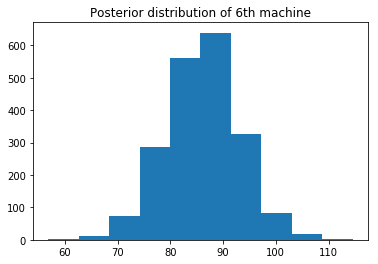

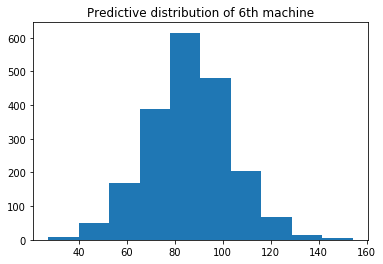

In [12]:
plot_i_ii()

##### Answer for iii)
This histogram for the 7th machine should be the same as in i) for the 6th machine because they have the same distribution also this case

-------------------------------

**Hierarchical model**  



The answers are  after the source code.


In [13]:
%%capture
model="""
data {
    int<lower=0> N; // number of data points
    int<lower=0> K; // number of groups
    int<lower=1,upper=K> x[N]; // group indicator
    vector[N] y; //
}
parameters {
    real mu0;             // prior mean
    real<lower=0> sigma0; // prior std
    vector[K] mu;         // group means
    real<lower=0> sigma;  // common std
}
model {
  mu0 ~ normal(10,10);      // weakly informative prior
  sigma0 ~ cauchy(0,4);     // weakly informative prior
  mu ~ normal(mu0, sigma0); // population prior with unknown parameters
  sigma ~ cauchy(0,4);      // weakly informative prior
  y ~ normal(mu[x], sigma);
}
generated quantities {
    real ypred_6; // predictive distribution for the 6th machine
    ypred_6 = normal_rng(mu[6], sigma);
}
"""

data = dict(N=30, K=6, x=x, y=y)
sm = pystan.StanModel(model_code=model)
fit = sm.sampling(data=data, iter=1000, chains=4)
samples = fit.extract(permuted=True)

def plot_i_ii():
    plt.hist(samples['mu'][:,5])
    plt.title('Posterior distribution of 6th machine')
    plt.show()
    plt.hist(samples['ypred_6'])
    plt.title('Predictive distribution of 6th machine')
    plt.show()
    

##### Stan model inference

In [15]:
print(fit)

Inference for Stan model: anon_model_21c2e5744abac4d4e83d90f1f235092a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0      19.87     0.2  10.12  -0.36  13.16  20.23  26.65  39.86   2679    1.0
sigma0   76.63     0.6  27.34  40.53  58.57  71.16  88.57 141.83   2098    1.0
mu[1]    75.15    0.13   7.07  59.86  70.74  75.41  79.61  89.04   3092    1.0
mu[2]   105.29    0.12   6.57  92.25 101.09 105.41 109.63 118.33   2853    1.0
mu[3]    87.04    0.12   6.49  73.48  82.78  87.11  91.49  99.85   3048    1.0
mu[4]   110.87    0.12   6.67  97.42 106.29 110.84 115.39 124.02   3230    1.0
mu[5]    89.31    0.13   6.43  76.23  85.17  89.33  93.31 102.17   2450    1.0
mu[6]    85.47    0.12   6.88  71.58  81.03  85.43  89.98  99.28   3157    1.0
sigma    14.61    0.06   2.24  11.18  12.99  14.29   15.9  20.04   1488    1.0
ypred_6  85.32    0.36 

##### Answers for i) and ii)

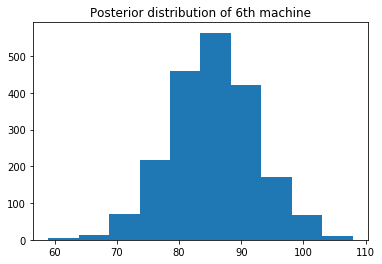

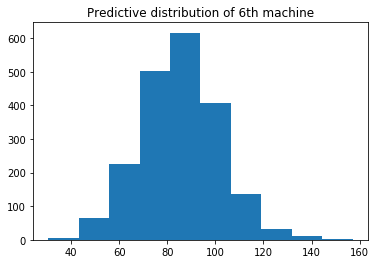

In [16]:
plot_i_ii()